# Oasis Infobyte

# Task : 3
NUMBER RECOGNITION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout

In [2]:
(xtr, ytr), (xtst,ytst) = mnist.load_data()

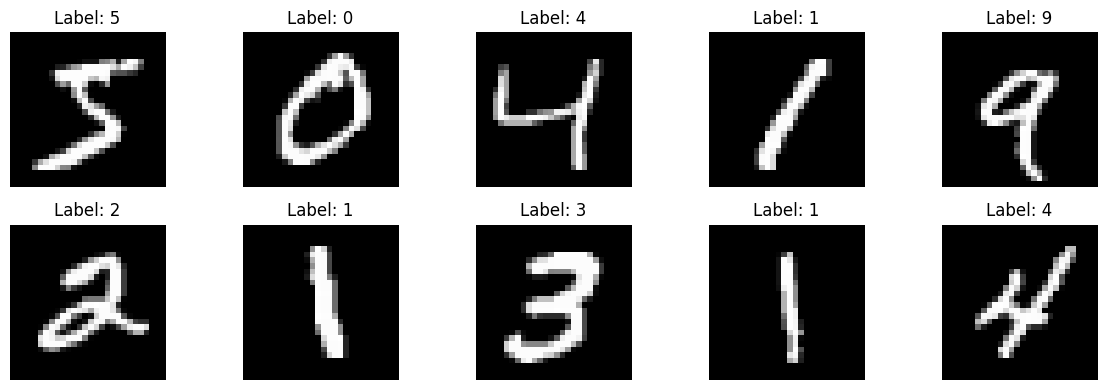

In [3]:
plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(xtr[i], cmap='gray')
    plt.title(f"Label: {ytr[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
xtr=xtr.astype('float32')/255
xtst=xtst.astype('float32')/255

In [5]:
model = Sequential()

In [6]:
xtr.shape

(60000, 28, 28)

In [7]:
xtr= xtr.reshape([-1, 28, 28, 1])
xtst = xtst.reshape([-1, 28, 28, 1])

In [8]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [11]:
history=model.fit(xtr, ytr, epochs=10, batch_size=64, validation_data=(xtst, ytst))

Epoch 1/10
938/938 [==============================] - 21s 23ms/step - loss: 0.1892 - accuracy: 0.9614 - val_loss: 0.1150 - val_accuracy: 0.9788
Epoch 2/10
938/938 [==============================] - 20s 22ms/step - loss: 0.1276 - accuracy: 0.9741 - val_loss: 0.0886 - val_accuracy: 0.9838
Epoch 3/10
938/938 [==============================] - 21s 22ms/step - loss: 0.0977 - accuracy: 0.9808 - val_loss: 0.0796 - val_accuracy: 0.9839
Epoch 4/10
938/938 [==============================] - 21s 23ms/step - loss: 0.0788 - accuracy: 0.9840 - val_loss: 0.0755 - val_accuracy: 0.9847
Epoch 5/10
938/938 [==============================] - 21s 22ms/step - loss: 0.0692 - accuracy: 0.9855 - val_loss: 0.0619 - val_accuracy: 0.9872
Epoch 6/10
938/938 [==============================] - 21s 22ms/step - loss: 0.0610 - accuracy: 0.9869 - val_loss: 0.0627 - val_accuracy: 0.9871
Epoch 7/10
938/938 [==============================] - 21s 22ms/step - loss: 0.0525 - accuracy: 0.9897 - val_loss: 0.0601 - val_accuracy:

In [12]:
test_loss, test_acc = model.evaluate(xtst, ytst)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0595 - accuracy: 0.9881
Test accuracy: 0.988099992275238


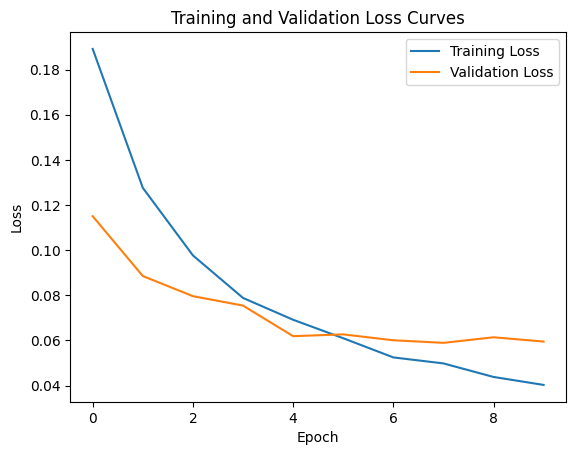

In [13]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

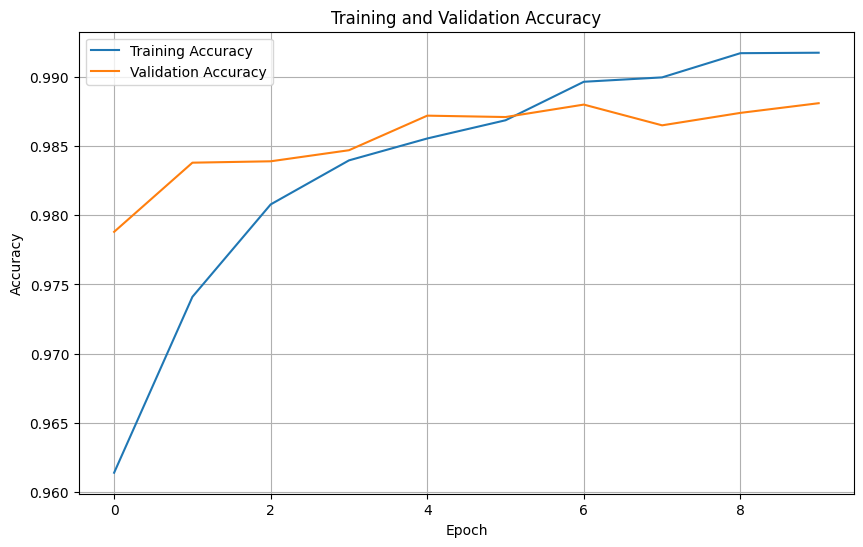

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.legend()
plt.grid(True)
plt.show()

In [15]:
predictions =model.predict(xtst)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 2s 6ms/step


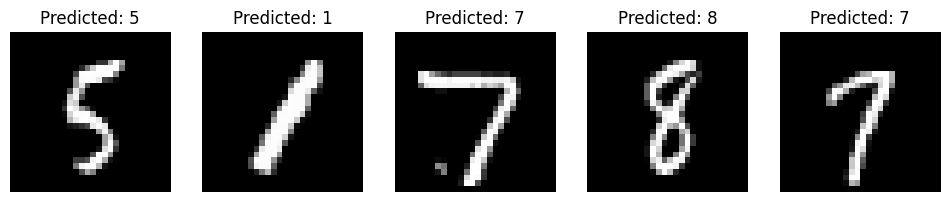

In [16]:
n_samples = 5
sample_indices = np.random.randint(0, len(xtst), n_samples)

fig, axes = plt.subplots(1, n_samples, figsize=(12, 4))

for i, index in enumerate(sample_indices):
    axes[i].imshow(xtst[index].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Predicted: {predicted_labels[index]}')
    axes[i].axis('off')

plt.show()

In [17]:
model.save('MNISTNUMBERSMODEL')

INFO:tensorflow:Assets written to: MNISTNUMBERSMODEL\assets


INFO:tensorflow:Assets written to: MNISTNUMBERSMODEL\assets
